In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/smsspamcollection (1).tsv', sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
len(df)

5572

In [5]:
df['label'].count()

np.int64(5572)

In [6]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [7]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


In [8]:
df['length'].describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [9]:
df.info()
print("\nShape of the dataset:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB

Shape of the dataset: (5572, 4)


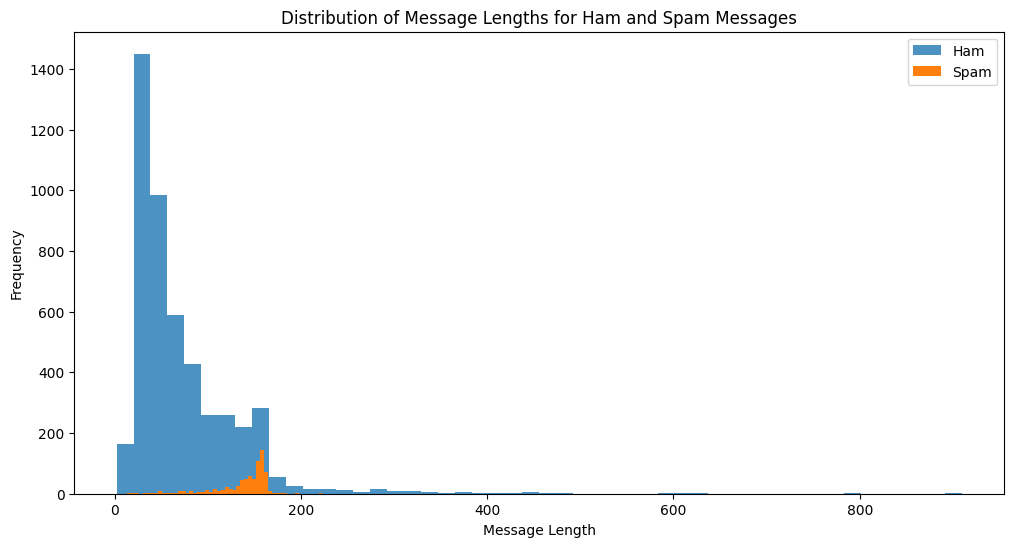

In [10]:
plt.figure(figsize=(12, 6))
plt.hist (df[df['label'] == 'ham']['length'], bins=(50), alpha=0.8, label='Ham')
plt.hist(df[df['label'] == 'spam']['length'], bins=50, alpha=1, label='Spam')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.title('Distribution of Message Lengths for Ham and Spam Messages')
plt.legend()
plt.show()

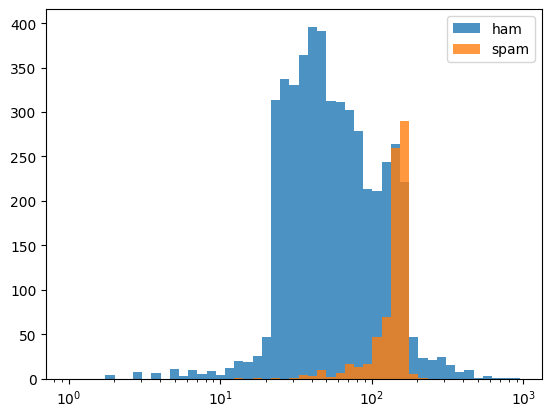

In [11]:
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0, 50))
plt.hist(df[df['label'] == 'ham']['length'] , bins= bins , alpha=0.8)
plt.hist(df[df['label'] == 'spam']['length'] , bins= bins , alpha=0.8)
plt.legend(['ham' , 'spam'])
plt.show()

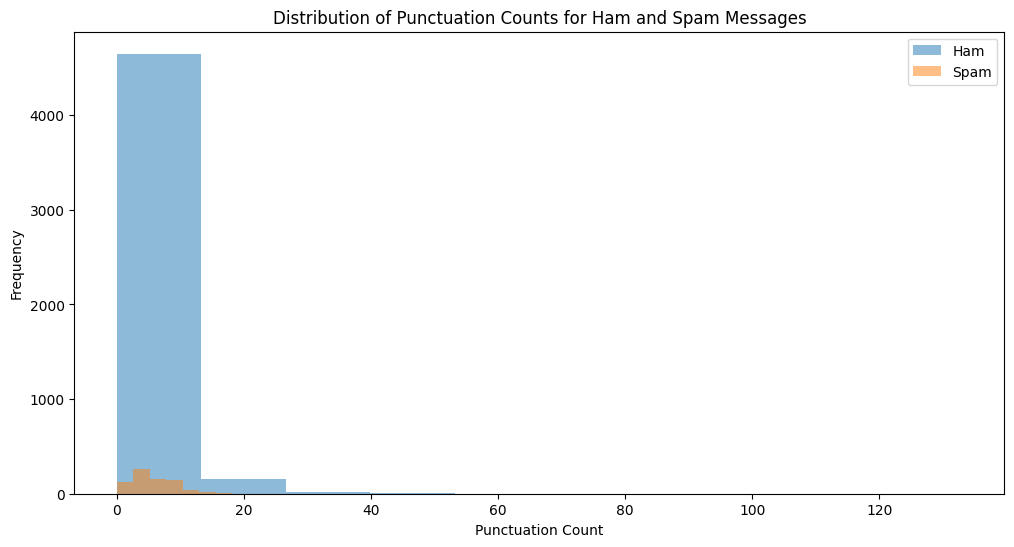

In [12]:
plt.figure(figsize=(12, 6))
plt.hist(df[df['label'] == 'ham']['punct'], bins=10, alpha=0.5, label='Ham')
plt.hist(df[df['label'] == 'spam']['punct'], bins=10, alpha=0.5, label='Spam')
plt.xlabel('Punctuation Count')
plt.ylabel('Frequency')
plt.title('Distribution of Punctuation Counts for Ham and Spam Messages')
plt.legend()
plt.show()

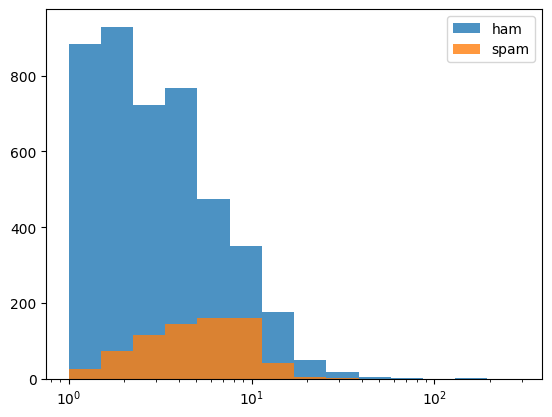

In [13]:
%matplotlib inline

plt.xscale('log')
bins = 1.5**(np.arange(0, 15))
plt.hist(df[df['label'] == 'ham']['punct'] , bins= bins , alpha=0.8)
plt.hist(df[df['label'] == 'spam']['punct'] , bins= bins , alpha=0.8)
plt.legend(['ham' , 'spam'])
plt.show()

##1

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(df['message'])
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

ham_df = dtm_df[df['label'] == 'ham']
spam_df = dtm_df[df['label'] == 'spam']

ham_word_counts = ham_df.sum(axis=0)
spam_word_counts = spam_df.sum(axis=0)

ham_word_counts_series = pd.Series(ham_word_counts).sort_values(ascending=False)
spam_word_counts_series = pd.Series(spam_word_counts).sort_values(ascending=False)

In [15]:

print(ham_word_counts_series)

print(spam_word_counts_series)

you            1948
to             1562
the            1133
and             858
in              823
               ... 
021               0
02085076972       0
02073162414       0
02072069400       0
0207              0
Length: 8713, dtype: int64
to         691
call       355
you        297
your       264
free       224
          ... 
laughs       0
laundry      0
laurie       0
callon       0
lay          0
Length: 8713, dtype: int64


##2

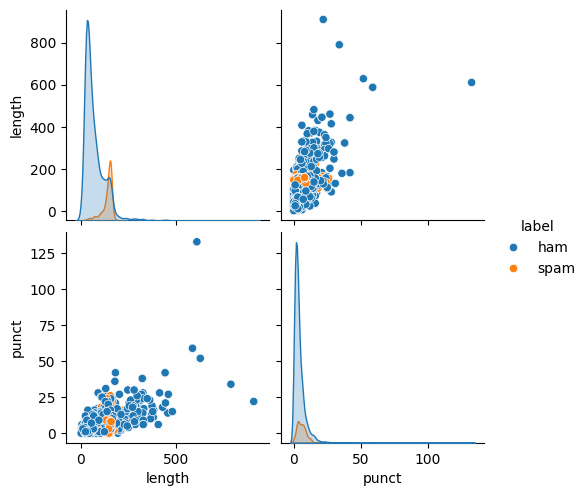

In [16]:
sns.pairplot(df, hue='label')
plt.show()

In [17]:
#x_train , x_test , y_train , y_test = train_test_split(df[['length' , 'punct']] , df['label'] , test_size=0.2 , random_state=42)

In [18]:
x_train , x_test , y_train , y_test = train_test_split(df[['length' , 'punct']] , df['label'] , test_size=0.33 , random_state=2)

In [19]:
print("shape of train : ",x_train.shape)
print("shape of test : ",x_test.shape)

shape of train :  (3733, 2)
shape of test :  (1839, 2)


In [20]:
#lr = LogisticRegression('''optimizer: {solver='lbfgs'}''')
#lr.fit(x_train , y_train)

In [21]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(x_train , y_train)

LogisticRegression()

In [22]:
y_pre = lr.predict(x_test)

In [23]:

model_score = lr.score(x_test, y_test)
print(model_score)


0.8368678629690048


In [24]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pre))

[[1534   52]
 [ 248    5]]


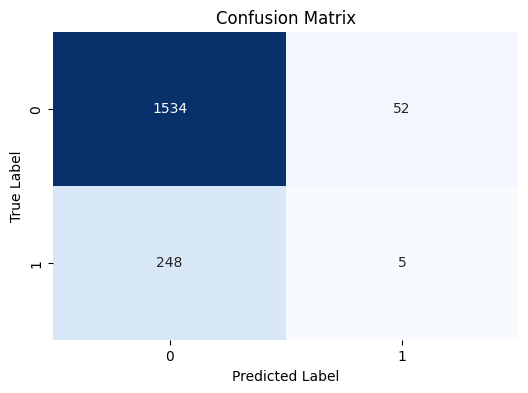

In [25]:

cm = metrics.confusion_matrix(y_test, y_pre)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [26]:
print(metrics.classification_report(y_test, y_pre))

              precision    recall  f1-score   support

         ham       0.86      0.97      0.91      1586
        spam       0.09      0.02      0.03       253

    accuracy                           0.84      1839
   macro avg       0.47      0.49      0.47      1839
weighted avg       0.75      0.84      0.79      1839



In [27]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
def model(m):
  model = model

In [28]:
preduction = nb.predict(x_test)
print(metrics.confusion_matrix(y_test, preduction))


[[1573   13]
 [ 250    3]]


In [31]:

model_score = nb.score(x_test, y_test)
print(model_score)

0.8569874932028276


In [29]:
print(metrics.classification_report(y_test, preduction))

              precision    recall  f1-score   support

         ham       0.86      0.99      0.92      1586
        spam       0.19      0.01      0.02       253

    accuracy                           0.86      1839
   macro avg       0.53      0.50      0.47      1839
weighted avg       0.77      0.86      0.80      1839



In [32]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [40]:
def pre(model):


  model.fit(x_train, y_train)


  pre = model.predict(x_test)
  print(metrics.confusion_matrix(y_test, pre) , "\n")


  print(model.score(x_test, y_test), "\n")

  print(metrics.classification_report(y_test, pre))


In [41]:
pre(svm)

[[1570   16]
 [ 227   26]] 

0.867862969004894 

              precision    recall  f1-score   support

         ham       0.87      0.99      0.93      1586
        spam       0.62      0.10      0.18       253

    accuracy                           0.87      1839
   macro avg       0.75      0.55      0.55      1839
weighted avg       0.84      0.87      0.82      1839

